In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

churn = pd.read_csv('files_for_lab/customer_churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
### 3. Extract and scale idenependent variables

In [8]:
dfx = churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
dfy = churn['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

<AxesSubplot:xlabel='Churn', ylabel='count'>

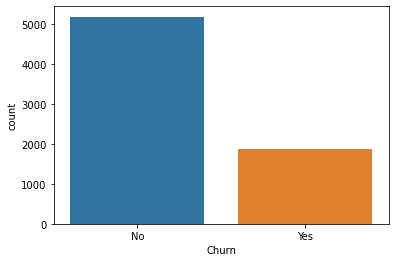

In [63]:
# CHECKING FOR CLASS IMBALANCE

dfy.value_counts()
sns.countplot(x = 'Churn', data=churn)


In [13]:
churn['tenure'].isna().sum() #0
churn['SeniorCitizen'].isna().sum() #0
churn['MonthlyCharges'].isna().sum() #0

0

In [17]:
churn['tenure'].dtypes  #int
churn['SeniorCitizen'].dtypes #int
churn['MonthlyCharges'].dtypes #float64

dtype('float64')

In [35]:
churn['tenure'].nunique() #73 unique values
churn['SeniorCitizen'].unique() #2 unique values (0,1)
churn['MonthlyCharges'].nunique() # 1585 unique values

1585

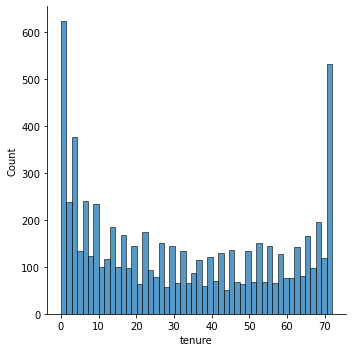

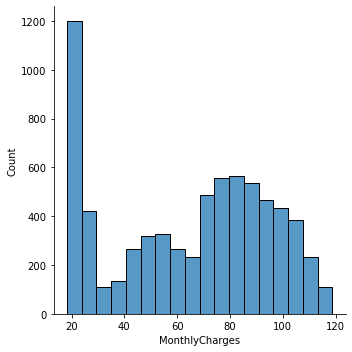

In [36]:
sns.displot(churn['tenure'], bins = 50)
sns.displot(churn['MonthlyCharges'])

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

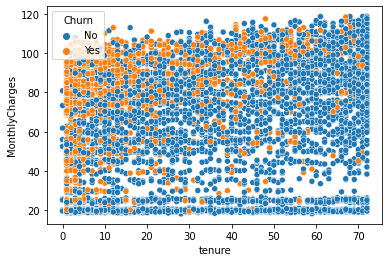

In [130]:
sns.scatterplot(data = churn, x ='tenure', y = 'MonthlyCharges', hue = 'Churn')



<AxesSubplot:>

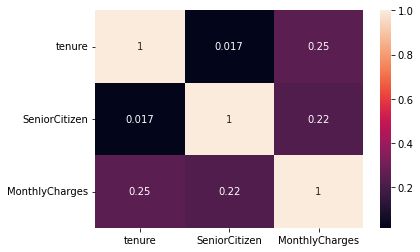

In [75]:
# CHECKING FOR NO COLINIARITY

matrix = dfx.corr()
sns.heatmap(matrix, annot = True) # No Coliniearity between x-features


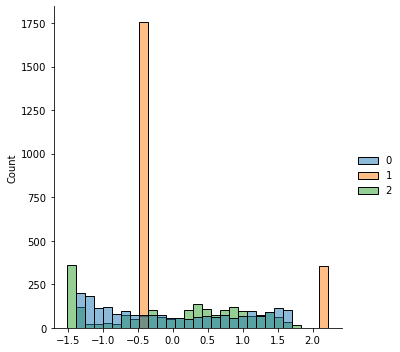

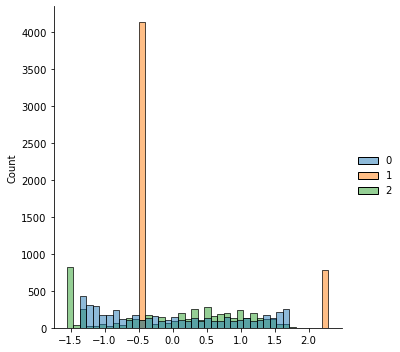

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, train_size = 0.3, random_state = 22)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)


sns.displot(X_train_sc)
sns.displot(X_test_sc)

In [83]:
y_train
y_test

6187     No
6448    Yes
5492     No
2028     No
5376     No
       ... 
727      No
5756     No
5881     No
6182     No
2849     No
Name: Churn, Length: 4931, dtype: object

### 5. Build the logistic regression model.

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression

In [184]:
clf = LogisticRegression(random_state = 22)
clf.fit(X_train_sc, y_train)
y_train_pred = clf.predict(X_train_sc)
y_test_pred = clf.predict(X_test_sc)

In [185]:
clf.predict(X_test_sc)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [186]:
clf.predict_proba(X_test_sc)

array([[0.85479002, 0.14520998],
       [0.83304405, 0.16695595],
       [0.99038958, 0.00961042],
       ...,
       [0.76060637, 0.23939363],
       [0.9471743 , 0.0528257 ],
       [0.87874845, 0.12125155]])

### 6. Evaluate the Model

In [187]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print('\n ---- scores for YES\n')
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test, y_test_pred, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test, y_test_pred, pos_label="Yes")))
print('\n ---- scores for NO\n')
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label='No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test, y_test_pred, pos_label='No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test, y_test_pred, pos_label="No")))
print('\n ---- Kappa\n')

print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST set is: 0.79

 ---- scores for YES

The precision in the TEST set is: 0.64
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.53

 ---- scores for NO

The precision in the TEST set is: 0.82
The recall in the TEST set is: 0.91
The F1 in the TEST set is: 0.86

 ---- Kappa

The Kappa in the TEST set is: 0.40


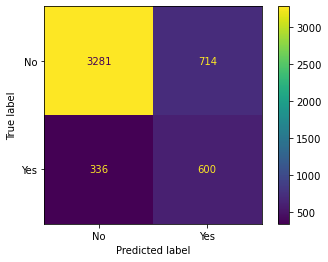

In [188]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_pred, y_test)
dis = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
dis.plot()

#### 7. Even a simple model will give us more than 70% accuracy. Why?

BECAUSE of how the accuracy is calculated and the class imbalance. 

Even if the model only predicts 'NO' we will have a accuracy of 73%. 

FORMULA: (TP + TN) / total --> 5174 +0 / 7043

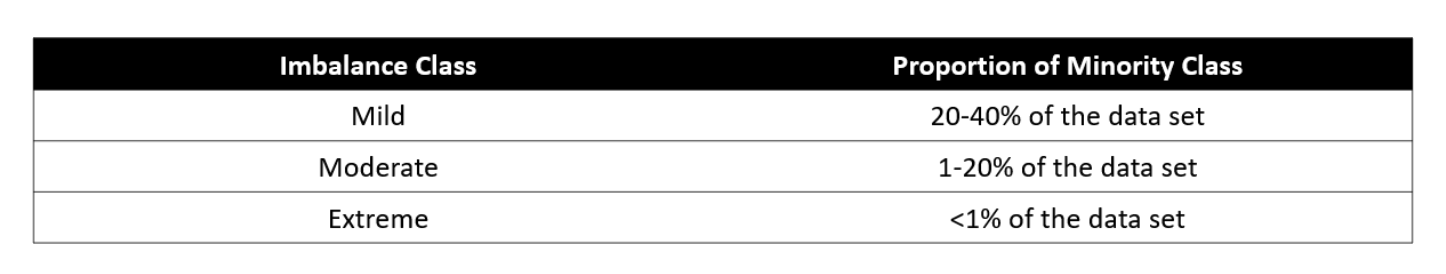

In [122]:
#dfy.value_counts()
dfy.shape
#sns.countplot(x = 'Churn', data=churn)

(7043,)


 #### 8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [131]:
! pip install -U imbalanced-learn



/Users/steib/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([[-0.3445884 , -0.44873733,  0.52212727],
       [ 1.39697431, -0.44873733, -1.47622684],
       [-1.19511903,  2.2284752 , -1.28118483],
       ...,
       [ 0.12071222, -0.44873733,  0.67122774],
       [ 0.03487194,  2.2284752 , -0.86447047],
       [-0.85346077,  2.2284752 ,  0.8866501 ]])

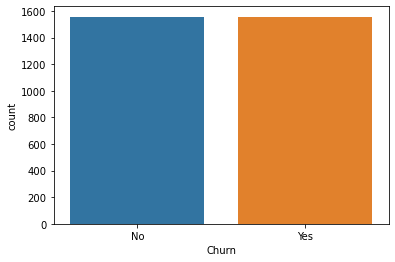

In [166]:
from imblearn.over_sampling import SMOTE

# OVERSAMPLE DATA WITH SMOTE

smote = SMOTE(random_state=22, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

sns.countplot(y_train_smote)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

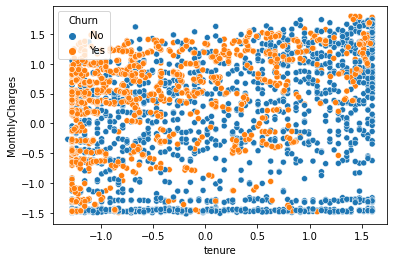

In [167]:
df_oversampler = pd.DataFrame(X_train_smote, columns = ['tenure', 'SeniorCitizen', 'MonthlyCharges'])
df_oversampler['Churn'] = y_train_smote

sns.scatterplot(data = df_oversampler, x ='tenure', y = 'MonthlyCharges', hue = 'Churn')

In [180]:
# LOGISTIC REGRESSION 

clf = LogisticRegression(random_state = 125)
clf.fit(X_train_smote, y_train_smote)

y_test_smote_pred = clf.predict(X_test_sc)


In [181]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_smote_pred)))
print('\n ---- scores for YES\n')
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_smote_pred, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test, y_test_smote_pred, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test, y_test_smote_pred, pos_label="Yes")))
print('\n ---- scores for NO\n')
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_smote_pred, pos_label='No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test, y_test_smote_pred, pos_label='No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_smote_pred, pos_label="No")))
print('\n ---- Kappa\n')

print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_smote_pred)))

The accuracy in the TEST set is: 0.73

 ---- scores for YES

The precision in the TEST set is: 0.49
The recall in the TEST set is: 0.74
The F1 in the TEST set is: 0.59

 ---- scores for NO

The precision in the TEST set is: 0.88
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.80

 ---- Kappa

The Kappa in the TEST set is: 0.40


In [190]:
from sklearn.metrics import classification_report

## COMPARE the two predictions: 


print('----- ORIGINAL DATA -------\n')
print(classification_report(y_test, y_test_pred))
print('\n ----- OVERSAMPLE SMOTE -------\n')
print(classification_report(y_test, y_test_smote_pred))


## --> Accuracity decreased however the model improved in predicting NOs. Recall improved for Yes. 

----- ORIGINAL DATA -------

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      3617
         Yes       0.64      0.46      0.53      1314

    accuracy                           0.79      4931
   macro avg       0.73      0.68      0.70      4931
weighted avg       0.77      0.79      0.77      4931


 ----- OVERSAMPLE SMOTE -------

              precision    recall  f1-score   support

          No       0.88      0.72      0.80      3617
         Yes       0.49      0.74      0.59      1314

    accuracy                           0.73      4931
   macro avg       0.69      0.73      0.69      4931
weighted avg       0.78      0.73      0.74      4931



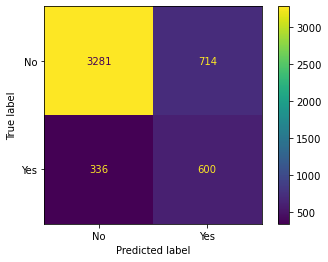

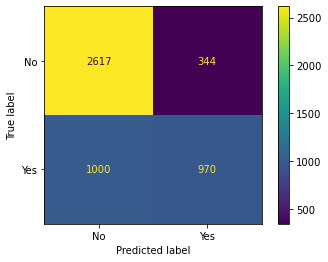

In [195]:
# COMPARE CONFUSION MATRIX


# 1. ORIGINAL
cm = confusion_matrix(y_test_pred, y_test)
dis = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
dis.plot()


# 2. SMOTE
cm = confusion_matrix(y_test_smote_pred, y_test)
dis = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
dis.plot()



